In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("./data.csv")

In [ ]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
df.shape

(3998, 39)

In [ ]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


## Univariate Analysis

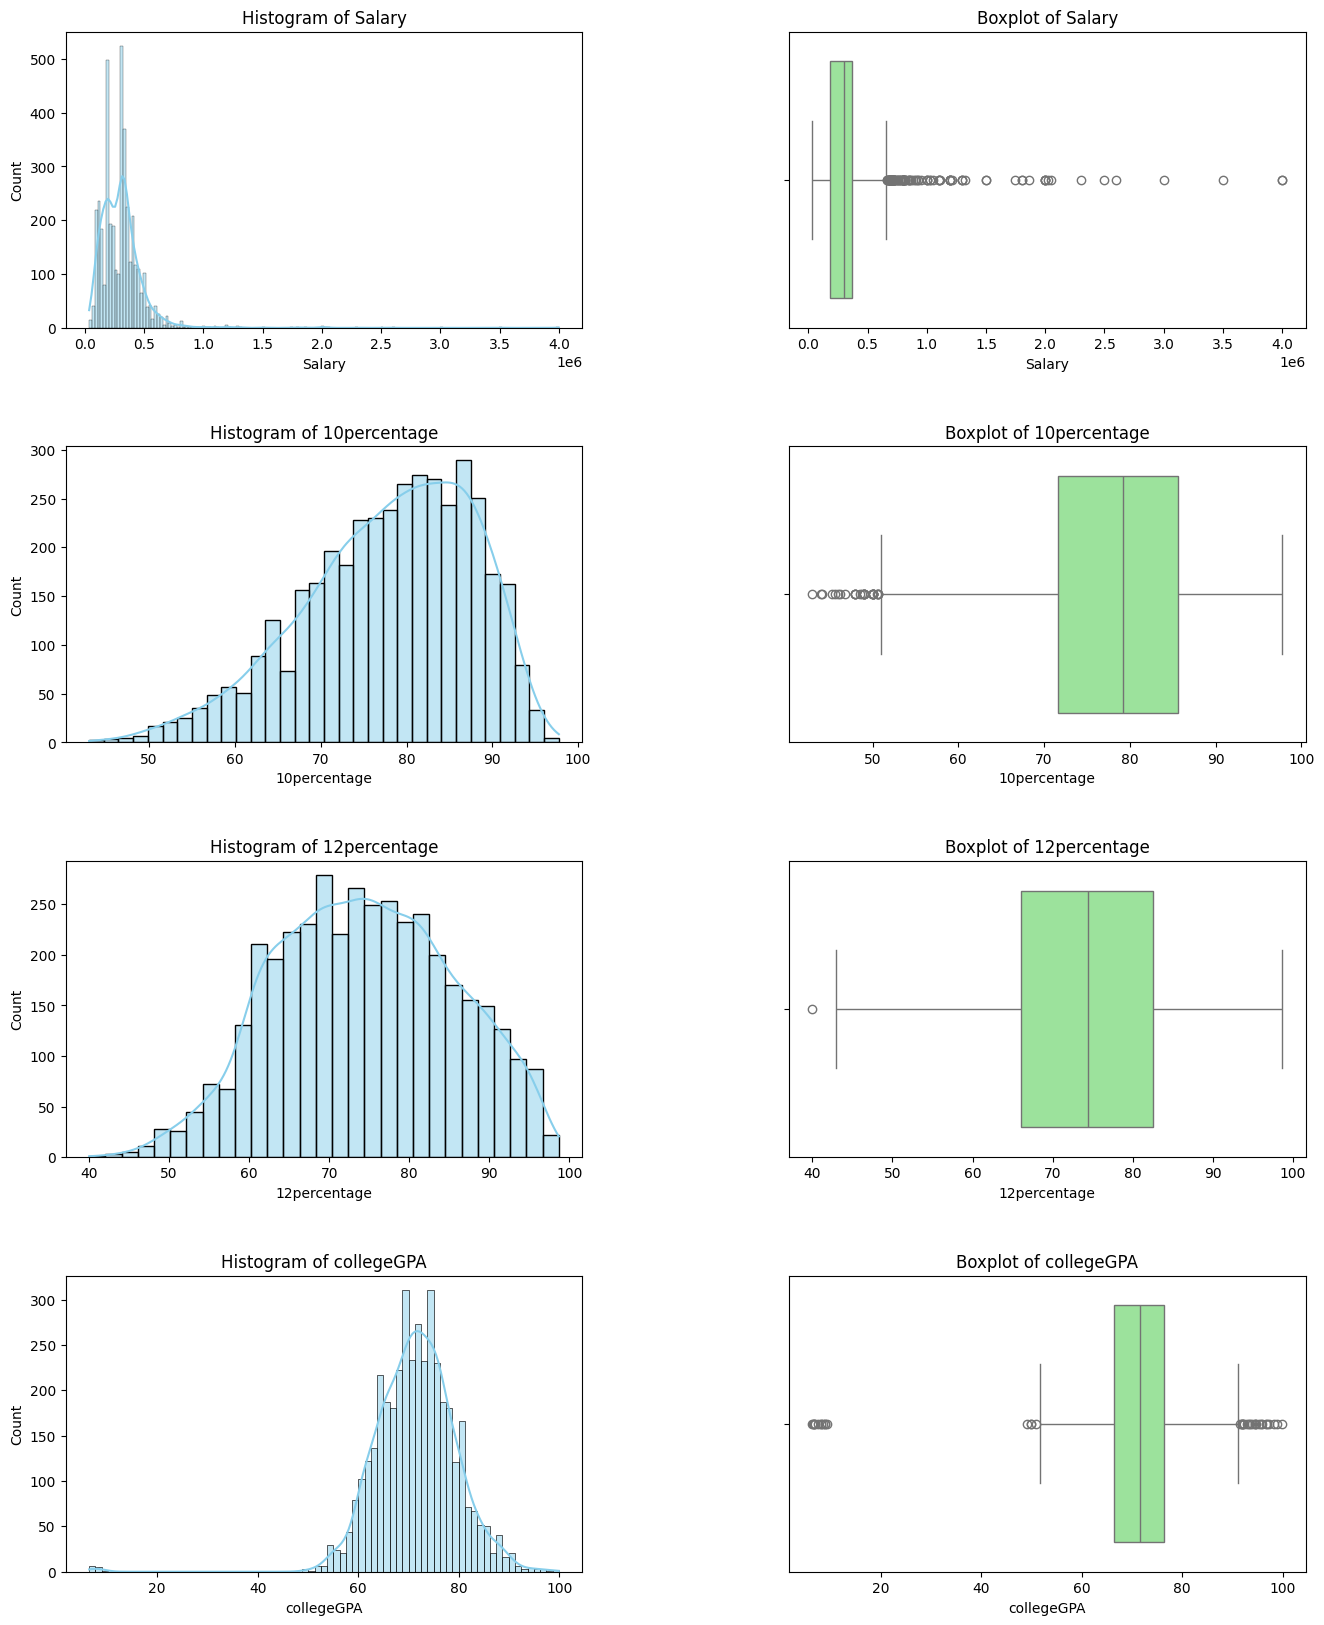

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

numerical_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA']

for i, col in enumerate(numerical_columns):
    # Histogram for frequency distribution
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f'Histogram of {col}')

    # Boxplot for outliers
    sns.boxplot(x=df[col], ax=axes[i, 1], color="lightgreen")
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.show()

### Observations on Numerical Columns

1. Salary:

- Histogram: The distribution of salaries is right-skewed, indicating that most of the individuals have salaries in the lower range, with a few exceptions having very high salaries.

- Boxplot: There are several outliers on the higher end of the salary range, suggesting that a few individuals have significantly higher salaries compared to the majority.

2. 10percentage (10th Grade Percentage):

- Histogram: The distribution appears to be slightly left-skewed, with most candidates having high percentages, indicating a concentration of higher academic scores in the 10th grade.

- Boxplot: Few outliers are present on both the lower and higher ends, indicating some students had exceptionally low or high scores compared to the majority.

3. 12percentage (12th Grade Percentage):

- Histogram: Similar to the 10th-grade percentage, the distribution is slightly left-skewed, showing a concentration of individuals with higher scores in the 12th grade.

- Boxplot: There are outliers on both ends, but they are not as pronounced as in the 10th-grade scores.

4. collegeGPA:

- Histogram: The distribution is somewhat normal but shows a slight left skewness. Most individuals have a GPA around the mean, with a concentration towards the higher end.

- Boxplot: There are outliers on both the lower and higher ends, indicating variations in GPA among individuals, with some having exceptionally low or high GPAs.

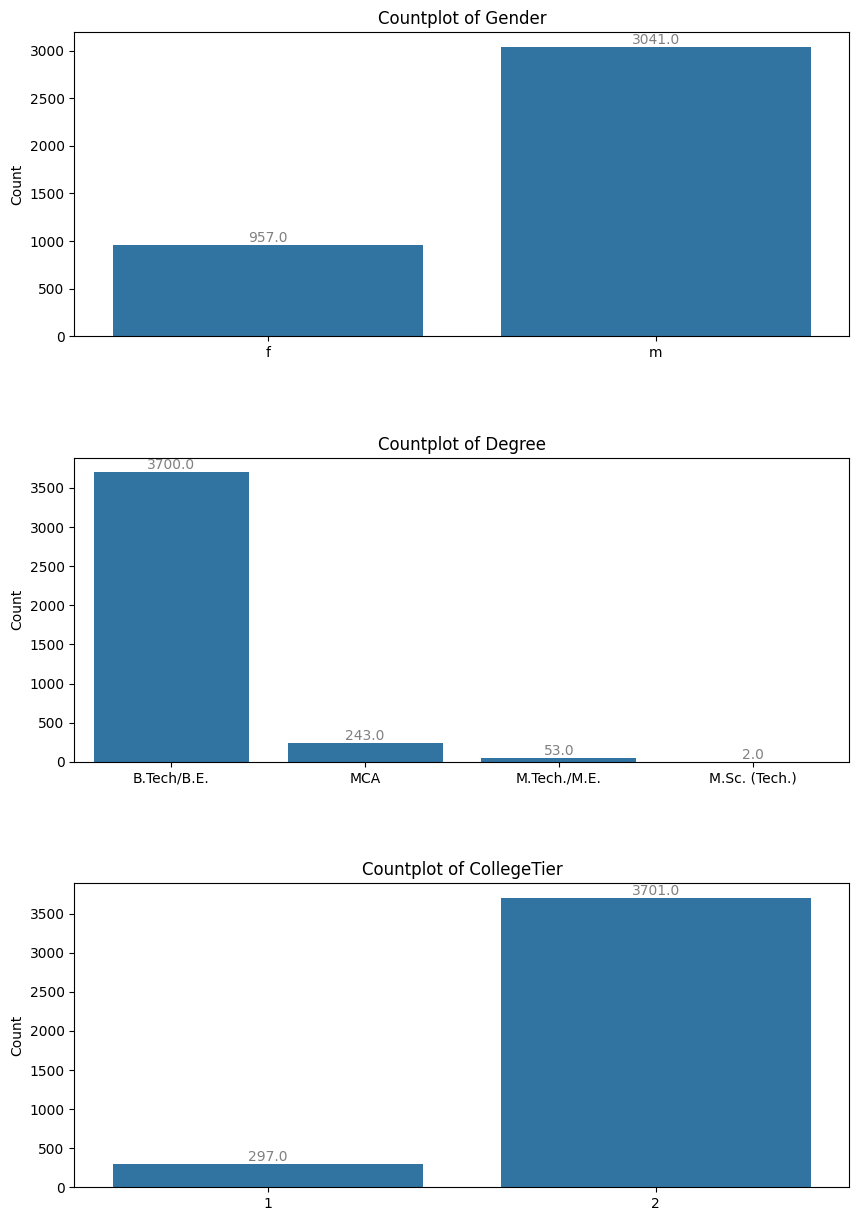

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.subplots_adjust(hspace=0.4)

categorical_columns = ['Gender', 'Degree', 'CollegeTier']

for i, col in enumerate(categorical_columns):
    # Countplot for frequency distribution
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                         textcoords='offset points')

plt.show()

### Observations on Categorical Columns

1. Gender:

The dataset has a higher number of males compared to females, indicating a gender imbalance among the individuals represented in the dataset.

2. Degree:

The majority of individuals have a degree in B.Tech/B.E., indicating a strong representation of engineering graduates. Other degrees like MCA, M.Tech./M.E., and MBA are less common, suggesting the dataset predominantly consists of engineering graduates.

3. CollegeTier:

A significant majority of individuals come from colleges classified under Tier 2, with a much smaller number coming from Tier 1 colleges. This suggests that the dataset mainly consists of graduates from Tier 2 colleges.

These observations provide valuable insights into the distribution and characteristics of the dataset's variables. The analysis of numerical columns revealed the presence of outliers in salary and academic scores, as well as variations in GPA. The categorical analysis highlighted the predominance of male, engineering graduates from Tier 2 colleges. These insights can be useful for further analysis, including predictive modeling or understanding the factors influencing job outcomes and salaries.

## Bivariate Analysis

### Numerical-Numerical Relationships

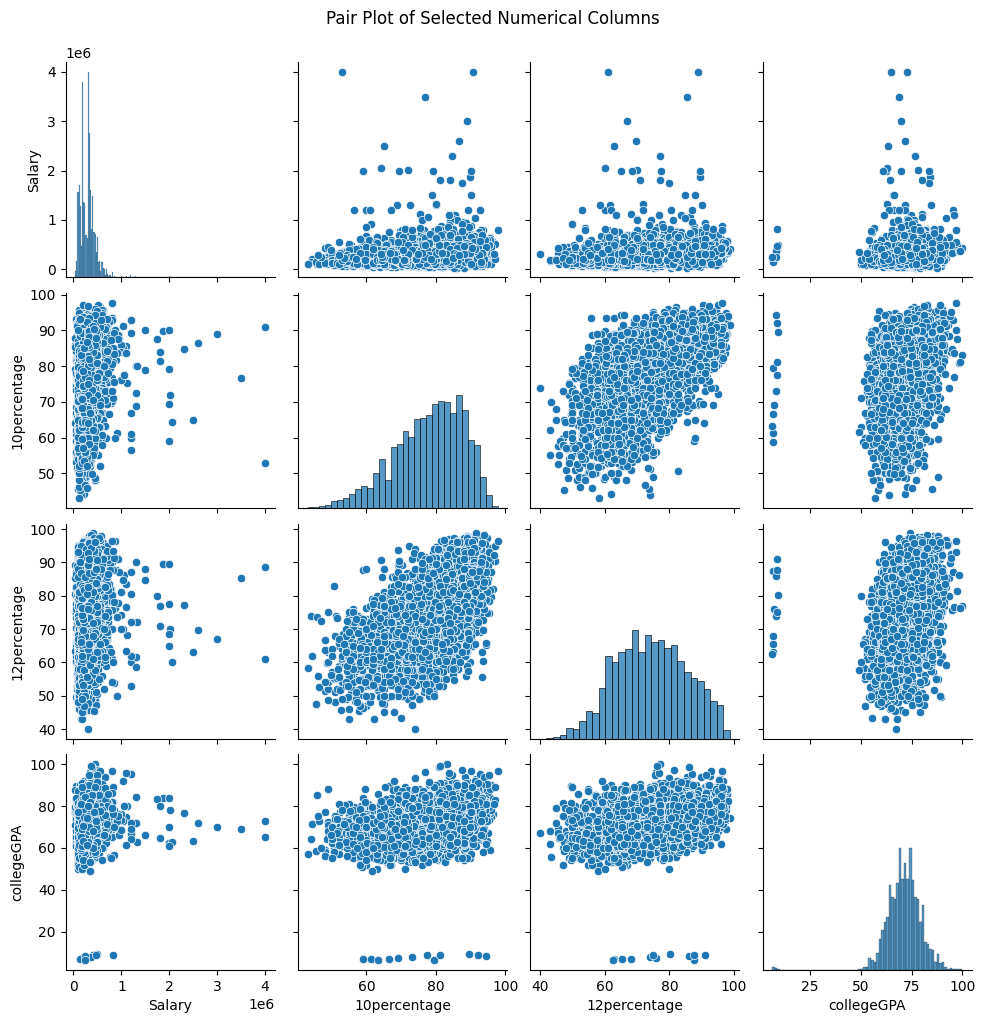

In [ ]:
numerical_columns = df[['Salary', '10percentage', '12percentage', 'collegeGPA']]

# Generating a pair plot
sns.pairplot(numerical_columns)
plt.suptitle('Pair Plot of Selected Numerical Columns', y=1.02)  # Adjust title position
plt.show()

### Observations from Pair Plot of Selected Numerical Columns

1. Salary vs. Academic Scores (10percentage, 12percentage, collegeGPA):

There does not seem to be a strong linear relationship between salary and academic scores (10th percentage, 12th percentage, college GPA). However, it's noticeable that higher academic scores do not necessarily correlate with higher salaries directly.
The distribution of salaries is right-skewed across different academic scores, highlighting that while higher academic performance is common, it does not guarantee a higher salary.

2. Academic Scores (10percentage, 12percentage, collegeGPA) Relationships:

There appears to be a positive relationship between 10th and 12th-grade percentages, indicating that students who perform well in the 10th grade tend to perform well in the 12th grade as well.

A similar positive relationship is observed between 12th-grade percentages and college GPA, suggesting a consistency in academic performance from high school through college.

### Categorical-Numerical Relationships

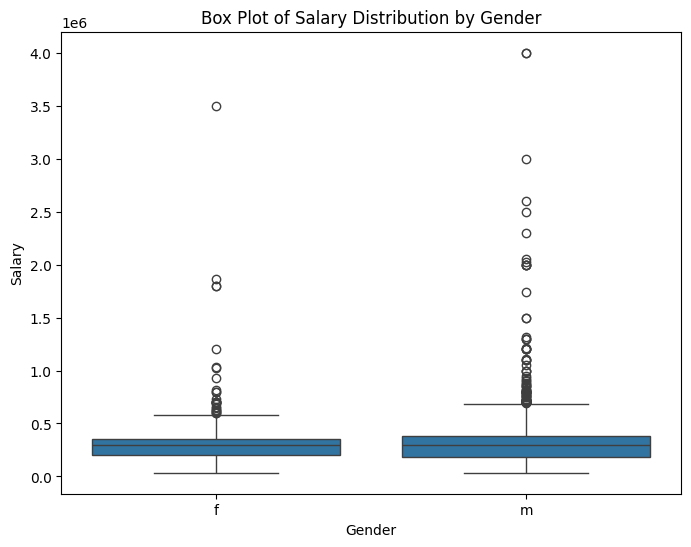

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Box Plot of Salary Distribution by Gender')
plt.show()

### Observations from Box Plot of Salary Distribution by Gender

- Gender Disparity: The box plot reveals a disparity in salary distribution between genders. While the median salary appears to be slightly higher for males compared to females, the range of salaries (especially the upper range) is broader for males. This suggests that males may have more representation in higher-paying jobs within this dataset.

- Outliers: Both genders have outliers in the salary distribution, indicating that there are individuals in both groups with salaries significantly higher than the general population. However, the number and spread of outliers are more pronounced for males, further indicating the presence of higher-paying positions among males.

### Categorical-Categorical Relationships

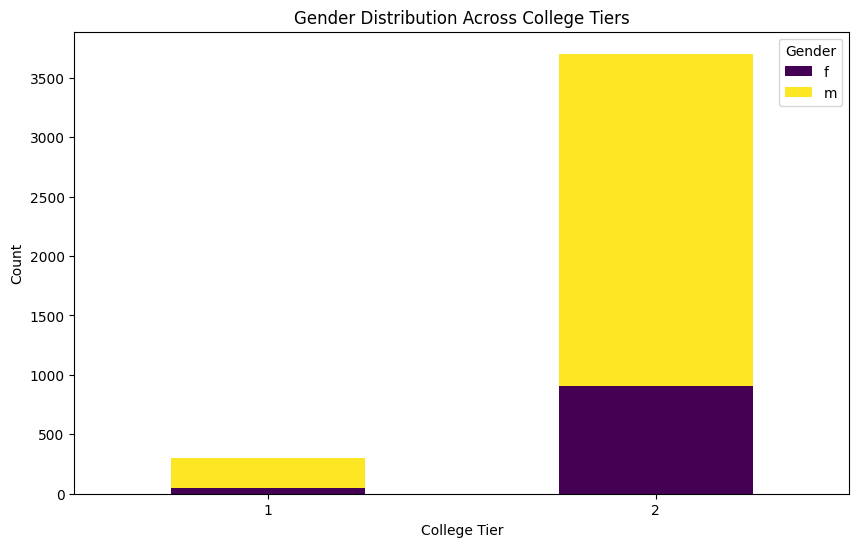

In [ ]:
gender_collegetier_counts = df.groupby(['CollegeTier', 'Gender']).size().unstack()

# Stacked bar plot for Gender distribution across CollegeTier
gender_collegetier_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Gender Distribution Across College Tiers')
plt.xlabel('College Tier')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')

plt.show()

### Observations from Stacked Bar Plot of Gender Distribution Across College Tiers

- Gender Distribution: The stacked bar plot shows that for both College Tier 1 and Tier 2, there are more males than females. This trend is consistent with the overall gender distribution observed earlier in the dataset.

- College Tier Impact: While the imbalance between genders is evident in both college tiers, the disparity appears to be more pronounced in Tier 2 colleges. This suggests that the gender imbalance in engineering or technical fields, as represented in this dataset, persists across different tiers of colleges.

## Research Questions

1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [ ]:
# Filter for Computer Science Engineering graduates (assuming 'computer science' appears in Specialization)
cs_graduates = df[df['Specialization'].str.lower().str.contains('computer science', na=False)]

# Filter for specific job roles
job_roles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']
cs_job_salaries = cs_graduates[cs_graduates['Designation'].str.lower().isin(job_roles)]

# Summary statistics of salaries for the filtered group
salary_summary = cs_job_salaries['Salary'].describe()

# Checking the percentage of individuals within the 2.5-3 lakhs range
salary_range_count = cs_job_salaries[(cs_job_salaries['Salary'] >= 250000) & (cs_job_salaries['Salary'] <= 300000)].shape[0]
salary_total_count = cs_job_salaries.shape[0]
salary_range_percentage = (salary_range_count / salary_total_count) * 100 if salary_total_count > 0 else 0

salary_summary, salary_range_count, salary_range_percentage

(count        142.000000
 mean      332711.267606
 std       135999.873852
 min        85000.000000
 25%       267500.000000
 50%       315000.000000
 75%       367500.000000
 max      1000000.000000
 Name: Salary, dtype: float64,
 25,
 17.6056338028169)

### Research Question 1 Observations:

For Computer Science Engineering graduates taking up jobs as Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer, the salary analysis reveals:

- The mean salary is approximately ₹332,711, which is above the 2.5-3 lakhs range mentioned in the claim.

- The median salary (50% percentile) is ₹315,000, also slightly above the upper limit of the claim.

- Minimum and maximum salaries range from ₹85,000 to ₹1,000,000, indicating a wide variance in compensation.

- Out of the filtered group, 25 individuals (approximately 17.6%) fall within the 2.5-3 lakhs salary range.

Conclusion: While the claim holds true for a subset of graduates (17.6%), the average and median salaries for the specified job roles among Computer Science Engineering graduates are higher than the stated range. This suggests that the potential earning capacity for these roles may be underreported in the claim.


2. Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [ ]:
# Count of each specialization by gender
specialization_gender_distribution = df.groupby(['Specialization', 'Gender']).size().unstack(fill_value=0)

# Display the distribution
specialization_gender_distribution

Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


### Research Question 2 Observations

The distribution of specializations by gender shows significant variation across different fields. Key observations include:

- High Participation in Certain Fields: Fields like 'computer science & engineering', 'electronics and communication engineering', and 'information technology' have high participation from both genders, with males generally outnumbering females.

- Gender-Specific Concentrations: Certain specializations such as 'biotechnology' and 'electronics & telecommunications' have relatively higher female participation compared to other engineering specializations.

- Fields with Low Female Representation: Specializations like 'mechanical engineering' and 'civil engineering' have a significantly higher number of males, with females being less represented.

Conclusion: The preference of specialization appears to depend on gender, with certain fields showing a higher concentration of one gender over the other. This distribution could be influenced by societal, cultural, or individual preferences or perceptions about certain fields of study.

To statistically verify if these differences are significant, a chi-square test could be performed. However, the clear differences in counts across various specializations already suggest that gender may play a role in the choice of specialization in engineering and technology fields.

## Additional Research Questions

1. Impact of College Tier on Salary:

Does graduating from a Tier 1 college significantly affect the starting salary compared to graduating from a Tier 2 college? This analysis could highlight the importance of college prestige on career outcomes.

2. Academic Performance vs. Career Success:

Is there a correlation between academic performance (measured by GPA and percentages in 10th and 12th grades) and professional success (measured by salary)? This could challenge or confirm the notion that higher academic achievements directly translate to better career opportunities.

3. Effect of Gender on Job Roles:

Are certain job roles within the technology and engineering sectors dominated by a particular gender? This question aims to identify potential gender biases or preferences in specific technology and engineering job roles.

4. Geographical Influence on Career Outcomes:

Does the job location (JobCity) influence the salary and job roles offered to graduates? This analysis could uncover regional disparities in career opportunities and salaries within the tech and engineering sectors.

5. Specialization and Industry Demand:

Which specializations are most in demand based on job roles and salaries offered? This question seeks to identify the specializations that currently have the highest market value, which could inform students and educators about the most lucrative fields of study.
